# **House Price Prediction: A linear Regression Case study**

---


## **Introduction.**
Linear regression is a supervised machine learning algorithm that is used to predict a continuous value. It is based on the idea of finding a line of best fit that can be used to predict the value of a dependent variable based on the value of an independent variable.

Normally the formula behind linear regression is:

      *  y = mx + b*

For this case study will be going through House price prediction. The casse study will help up decode what linear regression is and what it entails. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.  The Data is obtained from [kaggle](https://www.kaggle.com/datasets/shree1992/housedata).





### **Business Understanding**

The **Main objective** of the case study is to predict house prices based on the variables given.

**Metrics for success:** 

 * Building a linear regression model that can predict house prices (Best model should have the lowest RMSE).
* Identifying the top factors influencing the House Prices.


### **1. Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### **2. Loading and previewing the data set**



In [2]:
#load and preview data set
df = pd.read_csv('/content/HousePredictionDataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
#Previewing last 5 rows
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
#Shape of the data set
print(df.shape)

(4600, 18)


We have 18 columns for and 4600 rows


### **3. Data preparation and data cleaning**

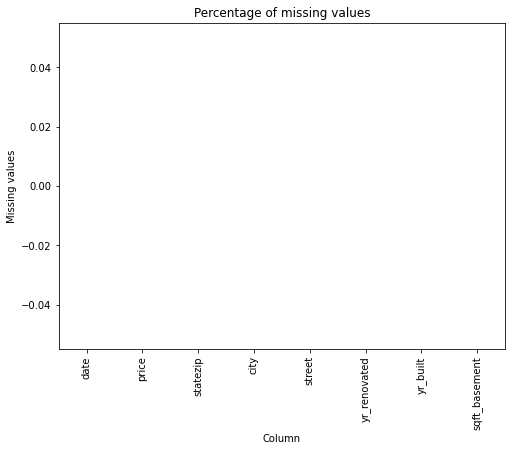

In [5]:
#checking for nulls using visualization
df.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'blue')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

We have no nulls

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
#separating variables for ease of analysis to those that can
#be considered continuous and categorical  
cat = ['street', 'city', 'statezip', 'country']
contin = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']

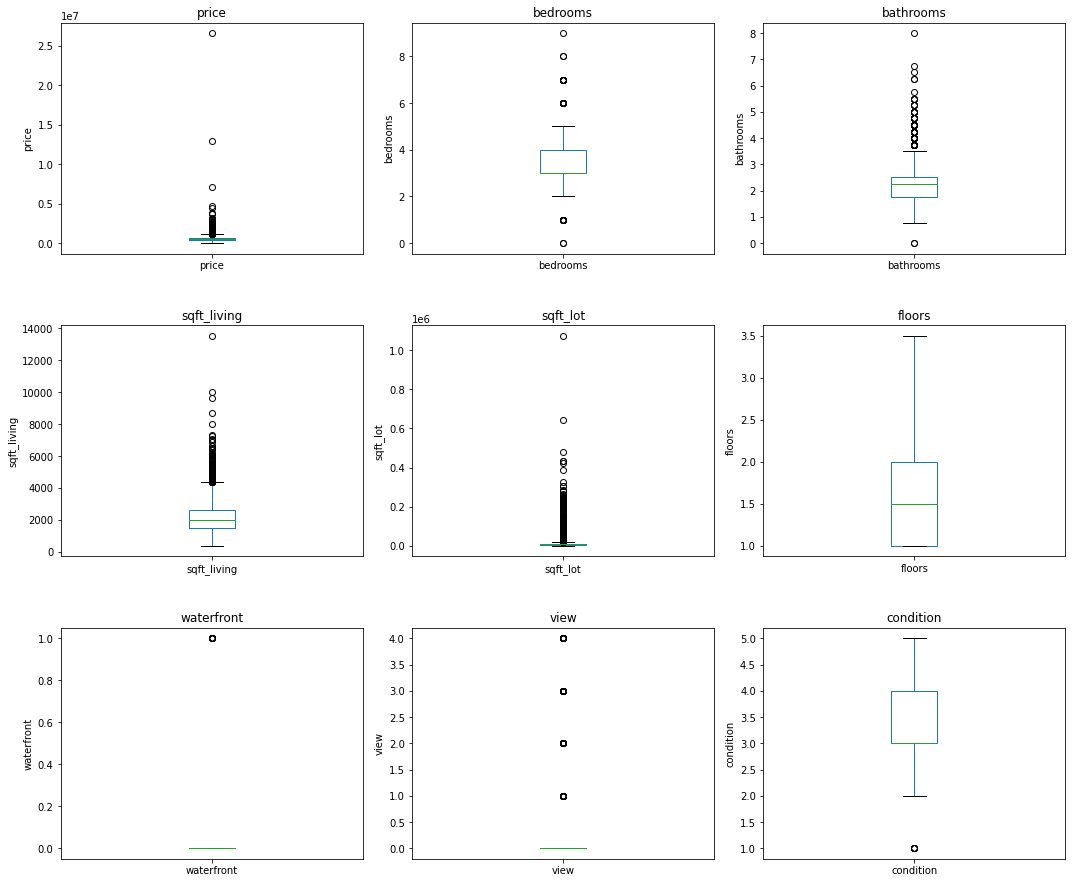

In [10]:
# Checking for outliers in continuous data

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(contin[i], grid=False, ax=ax)
  ax.set_title(f"{(contin[i])}")
  ax.set_ylabel(contin[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

We have outliears in some columns but will not drop those columns since most real data has or always has outliears. It's also a clear indication of what happening at the ground.


In [11]:
#checking for anomalies

#None of the values in the continuous columns should be negative
for col in contin:
  print(len(df[df[col] < 0]))
#none had values < 0 

0
0
0
0
0
0
0
0
0
0
0
0
0


We have no anomalies in our data set.

In [12]:
#datatype conversion

#date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

### **4. Exploratory data analysis**

Here will explore the train dataset and come up with some  visualization

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [15]:
#statistical summaries of various numerical variables
df[contin].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


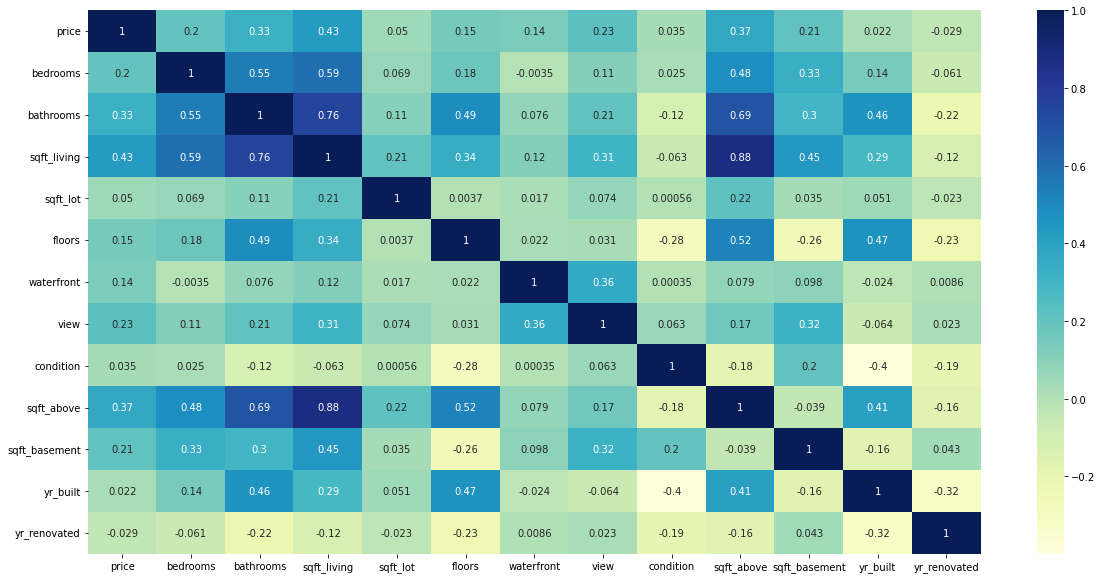

In [16]:
#checking how sale price correlates with other variables using a correlation map
#Correlation check
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

From the above heatmap we see prices has a high correlation with:


*   sqft_living
*   sqft_above

Wealso have high correlation between the following variables:


1.   sqft_above and sqft_living
2.   sqft_living and bedrooms and bathrooms
3.   Bedrooms and bathrooms



This expected since the more the rooms/bathrooms the more the area the house will occupy.

For prices the more the area the higher the price. Also bugalows vs flat vary in prices.

In [17]:
#checking most important features to price
print("Most important features relative to Sale Price")
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)


Most important features relative to Sale Price
price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


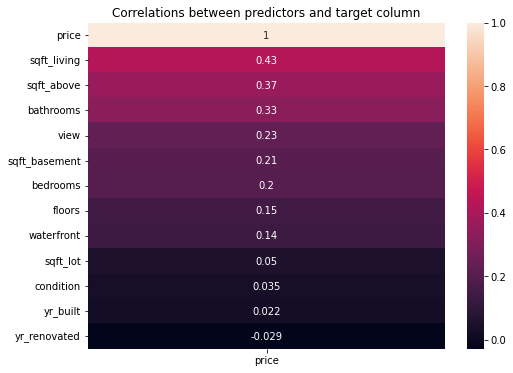

In [18]:
#we can highlight this correlations graphically as follows
corr = df.corr()
target_col=corr[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

# **Modeling**

In linear regression, the input data is represented as a set of feature vectors, and the output is a continuous value that we are trying to predict as shown in our casse study. The goal is to find the line of best fit that minimizes the sum of the squared errors between the predicted values and the true values.

To perform linear regression, you need to first split your data into a training set and a test set. You can then use the training set to fit a linear regression model, which consists of a set of coefficients that determine the line of best fit. Once the model is trained, you can use it to make predictions on the test set and evaluate the accuracy of the predictions.

Will now get our hands dirty on the modelling part.

**First will import the necessay libraries**

In [19]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

### **Preprocessing**

Before actual modeling will perform some further house cleaning. 
From our feature of importance we have seen the important features for price prediction will therefore all other unnecessary columns and move with only the necessary columns for model. This is an important set in modeling


In [20]:
df.drop(columns=['date', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'sqft_lot'], inplace=True, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,0
1,2384000.0,5.0,2.50,3650,2.0,0,4,5,3370,280
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,0
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1000
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,800


Now we need to separate our target from predictor variable. Also we need to split our data set to train and test data set.


In [21]:
#separating features and target for use in modelling

X = df.drop(['price'], axis=1)

y = df['price']

In [22]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

**Feature scaling**

This is the process of normalizing the range of features in a dataset

In simpler terms data sets contain features of varying degree of magnitude, ranges and units.

For a model to interpret these features they have to be put on the same scale
3 different scalers in the Scikit-learn library for feature scaling and they are:

* MinMaxScaler
* StandardScaler
* RobustScaler

*** 1. Normalization also called Min-Max scaling***

This is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

**Goal**:  make the data homogenous over all records and fields. It helps in creating a linkage between the entry data which in turn helps in cleaning and improving data quality.

Normalization feature scaling, is only required when the data distribution is unknown or the data doesn't have Gaussian Distribution. 

used when the data has a diversified scope and the algorithms on which the data are being trained do not make presumptions about the data distribution such as Artificial Neural Network.

 MinMaxScaler is the  function for normalisation.

            X_new = (X - X_min) / (X_max - X_min)


***2. Standardization also called  Z-score normalisation***

 This is a scaling technique whereby the values in a column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, that is mean = 0 and variance = 1.
 Standardized data is usually preferred when data is being used for multivariate analysis.  Data has gaussian distribution. No this isn't always true but is considered more effective when applied to Gaussian distribution. 

 StandardScaler is function for standardisation.

              X_new = (X - mean) / std




Will perform feature scaling for our data set and since it isn't gaussian and this is a linear regression case will be using standardization.

It's also important to note that feature scaling is applied to both train and test data set. However, we only fit and transform train data set and for the test set we only transform. This is because if you fit the test data it will compute a new mean and variance letting our model learn from test data set too eliminating the element of 'surprise' to our model.

In [23]:
#scaled features

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)



In [24]:
#Let's highlight the mean and range in the target column
print("mean: ", y.mean())
print("range: ", (y.max() - y.min()))


#This will be used as a reference while evaluating our model

mean:  551962.9884732141
range:  26590000.0


In [25]:
#creating a list that will track rmses
rmses = []

# **Baseline Model**

Will start by creating a baseline model where no hyperparameter are tuned. will come to that later

In [26]:
#using scaled features 

#fitting linear model
regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 72104998118.24356
Root Mean Squared Error: 268523.73846318235


In [27]:
#Printing our baseline RMSE
rmses

['Baseline linear model RMSE: 268523.73846318235']

## **Hyper Parameter tuning in Linear Regression**


Hyperparameter tuning is the process of selecting the optimal values for a model's hyperparameters. Hyperparameters are the parameters that are set prior to training a machine learning model and are not learned from the data during the training process. They control the overall behavior of the model and can have a significant impact on the model's performance.

For our case we have first build a baseline model, will then tune various parameter and see if our model improves. 

It's important to note that each algorthm has different approach on how parameters are tuned to get the best out of the model.



***a. checking for homoscedasticity***

Homoscedasticity is a statistical property that refers to the assumption that the variance of the error term in a statistical model is constant. In other words, it means that the error term has the same variance regardless of the value of the predictor variables.

Homoscedasticity is an important assumption in many statistical models, including linear regression. If the error term is not homoscedastic, it can lead to biased and inconsistent estimates of the model's parameters, as well as incorrect standard errors and confidence intervals.

There are several ways to test for homoscedasticity in a statistical model. One common method is to plot the residuals (the difference between the observed values and the predicted values) against the predicted values and look for patterns. If the variance of the residuals is constant, the plot will show a horizontal band of points. If the variance is not constant, the plot will show a cone-shaped pattern, with the points becoming more widely spread out as the predicted values increase or decrease.

If homoscedasticity is not present in the data, there are several ways to address it. One option is to transform the predictor variables or the response variable to make the variance of the error term more constant. Another option is to use a generalized linear model or a non-parametric model that is more robust to non-constant variance.

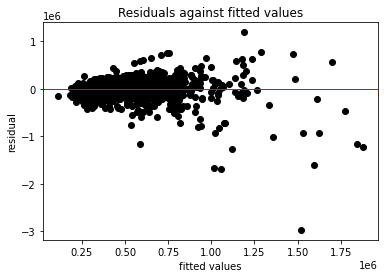

In [28]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()

Data shows heterosckedascticity. Will be tested using Barlett's test to confirm.

In [29]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variances are not homogenous')
else:
  print('the variances are homogeneous across the data')

the variances are not homogenous


With this will check if residuals are normally distributed

In [30]:
# importing the shapiro function
from scipy.stats import shapiro 


# testing for normality. extracting statistic and p value
stat, p = shapiro(residuals)


# interpreting
alpha = 0.05
if p > alpha:
	print('Sample appears to have a normal distribution')
else:
	print('Sample does not appear to have a normal distribution')
  

Sample does not appear to have a normal distribution


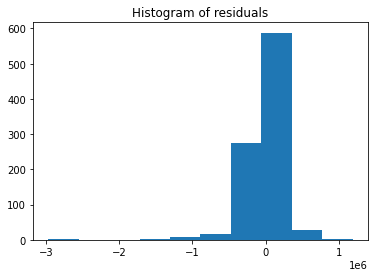


Skew of residuals: -2.7604357078391164


In [31]:
#plotting histogram of residuals
plt.hist(residuals, bins= 10)
plt.title("Histogram of residuals")
plt.show()

print(f'\nSkew of residuals: {residuals.skew()}')

The residuals have a negatively skewed distribution.

***b. Multicollinearity check***

Multicollinearity is a statistical phenomenon in which two or more predictor variables in a multiple regression model are highly correlated. This can lead to unstable and inconsistent estimates of the model's parameters, as well as incorrect standard errors and confidence intervals.

Another assumption of linear regression is little or no multicollinearity so checking for the presence of this phenomenon is important.


In [32]:
#checking for multicollinearity 
#creating function that will calculate the VIF for each feature
def vif(df, features):
  vif, tolerance = {}, {}
  for feature in features:
    #extract other features other than the one chosen as y into a list
    X = [f for f in features if f!=feature]
    X, y = df[X], df[feature]
    #extract r2
    r2 = LinearRegression().fit(X, y).score(X, y)
    #calculate tolerance
    tolerance[feature] = 1-r2
    #calculate VIF
    vif[feature] = 1/tolerance[feature]
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [50]:
#checking multicollinearity
vif(df, df.drop('price', axis=1).columns)

,VIF,Tolerance
bedrooms,1.661550,0.601848
bathrooms,2.917270,0.342786
sqft_living,inf,0.000000
floors,1.790054,0.558642
waterfront,1.155340,0.865546
view,1.327856,0.753094
condition,1.116076,0.895996
sqft_above,inf,0.000000
sqft_basement,inf,0.000000


Features with a variance inflation factor > 5 include:

* sqft_above
* sqft_basement



Regularisation (Ridge, lasso, and elastic net) can aid with handling multicollinearity

### **c. Lasso regression**

Lasso regression, also known as L1 regularization, is a type of linear regression that adds a penalty term to the loss function that is proportional to the absolute value of the model's parameters. The penalty term is controlled by a hyperparameter called the regularization strength or regularization coefficient, which determines the amount of shrinkage applied to the model's parameters.

Lasso regression has several properties that make it attractive for certain types of problems:

1. Feature selection: Lasso regression can automatically select the most important features for the model by setting the coefficients of the less important features to zero. This can be helpful in situations where the number of features is large and there may be redundant or irrelevant features.

2. Sparsity: Lasso regression tends to produce sparse models, which means that most of the model's parameters are zero. This can make the model easier to interpret and can reduce overfitting.

3. Robustness: Lasso regression is relatively robust to the presence of multicollinearity in the data.

One potential drawback of Lasso regression is that it can be sensitive to the scaling of the predictor variables. It is generally a good idea to scale the variables before fitting a Lasso model.

To tune the hyperparameters of a Lasso model, you can use methods such as cross-validation or grid search to find the combination of hyperparameters that leads to the best model performance.

In [34]:
#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 14.0}


In [35]:
#using scaled features 

#fitting lasso model 
lasso = Lasso(alpha=14.0)
lasso.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append([f'Tuned lasso model RMSE: {rmse}'])


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 72032470932.63219
Root Mean Squared Error: 268388.6564902328


In [36]:
# let's compare our new model to our baseline
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 268523.73846318235

['Tuned lasso model RMSE: 268388.6564902328']


There is a slight improvement on our RMSE for lasso compared to our baseline model

### **d. Ridge Regression**

Ridge regression, also known as L2 regularization, is a type of linear regression that adds a penalty term to the loss function that is proportional to the square of the model's parameters. The penalty term is controlled by a hyperparameter called the regularization strength or regularization coefficient, which determines the amount of shrinkage applied to the model's parameters.

1. Ridge regression has several properties that make it attractive for certain types of problems:

2. Stability: Ridge regression can help to improve the stability and interpretability of the model by reducing the variance of the coefficients.

3. Robustness: Ridge regression is relatively robust to the presence of multicollinearity in the data.

4. Predictive power: Ridge regression can sometimes have better predictive performance than Lasso regression, especially when the number of features is large and there are correlated features.

One potential drawback of Ridge regression is that it may be less effective at selecting the most important features for the model, as it does not set any coefficients to zero.

To tune the hyperparameters of a Ridge model, you can use methods such as cross-validation or grid search to find the combination of hyperparameters that leads to the best model performance.

In [37]:
#ridge regression
#finding best alpha value. 
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
ridge = Ridge(random_state=0)
#finding alpha value
search = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 19.0}


In [38]:
#using scaled features 

#fitting ridge model 
ridge = Ridge(alpha=19.0)
ridge.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Tuned ridge model RMSE: {rmse}')


Mean Squared Error: 72090755365.87517
Root Mean Squared Error: 268497.21668180317


In [39]:
#comparing our new model to our previous two models

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 268523.73846318235

['Tuned lasso model RMSE: 268388.6564902328']

Tuned ridge model RMSE: 268497.21668180317


RMSE in ridge regression is actually higher than that in Lasso. Hence Lasso regression is our best model so far

### **e. Elastic Net Regression**

Elastic Net regression is a type of linear regression that combines the L1 and L2 regularization terms of Lasso and Ridge regression. The penalty term is controlled by two hyperparameters: the L1 ratio, which determines the weight of the L1 penalty term, and the regularization strength or regularization coefficient, which determines the overall strength of the penalty term.

1. Elastic Net regression has several properties that make it attractive for certain types of problems:

2. Sparsity: Like Lasso regression, Elastic Net regression can produce sparse models, with many coefficients set to zero.

3. Robustness: Elastic Net regression is relatively robust to the presence of multicollinearity in the data.

4. Flexibility: Elastic Net regression allows for a balance between the sparsity of Lasso regression and the stability of Ridge regression, depending on the values of the L1 ratio and the regularization strength.

To tune the hyperparameters of an Elastic Net model, you can use methods such as cross-validation or grid search to find the combination of hyperparameters that leads to the best model performance. It is important to carefully choose the values of the L1 ratio and the regularization strength to achieve the desired trade-off between sparsity and stability.




In [40]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
parameters = {'alpha': np.concatenate(([0.0001,0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1))),
              'l1_ratio':[.2,.4,.6,.8,1]}

search=GridSearchCV(estimator=elastic,param_grid=parameters,scoring='neg_mean_squared_error')

search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.6}


In [41]:
#using scaled features 

#fitting model
elastic=ElasticNet(alpha=0.1,l1_ratio=0.6)
elastic.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test_sc)

#evaluating model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append(f'Tuned elastic net model RMSE: {rmse}')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 72521878618.02437
Root Mean Squared Error: 269298.86486582964


In [42]:
# comparing our four models

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 268523.73846318235

['Tuned lasso model RMSE: 268388.6564902328']

Tuned ridge model RMSE: 268497.21668180317

Tuned elastic net model RMSE: 269298.86486582964


Elastic net is worst than our baseline model making Lasso the best model

## **Comparing coefficients**

In [47]:
#list with feature names
x_cols = X.columns
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'sqft_above', 'sqft_basement'],
      dtype='object')

In [48]:
#creating dataframe with coefficients and rank of coefficients' absolute values
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank'] = df_coef['linear'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].apply(lambda x: abs(x)).rank(ascending=False)


df_coef.sort_values(by=['linear rank'])

,linear,linear rank,lasso,lasso rank,ridge,ridge rank,elastic,elastic rank
sqft_living,-3.137899e+18,1.0,228311.071073,1.0,115885.939719,1.0,110696.530981,1.0
sqft_above,2.767079e+18,2.0,0.000000,9.0,97683.071603,2.0,93263.218752,2.0
sqft_basement,1.524912e+18,3.0,7409.059745,8.0,61211.160080,3.0,58551.274170,3.0
bedrooms,-4.909821e+04,4.0,-46171.345587,2.0,-45308.961314,4.0,-39725.854331,5.0
view,4.111802e+04,5.0,41399.468133,3.0,41514.779390,5.0,42105.616255,4.0
condition,3.878944e+04,6.0,38556.243813,4.0,38332.577023,6.0,36772.387668,6.0
waterfront,2.687341e+04,7.0,26633.790189,5.0,26615.740509,7.0,26428.056356,7.0
bathrooms,2.314286e+04,8.0,20362.179936,6.0,21039.842855,8.0,24811.482301,8.0
floors,9.055635e+03,9.0,9369.811815,7.0,9340.739626,9.0,9160.828498,9.0


# **Conclusion**

The main objectives of the project were achieved:

Linear regression best model is achieved after tuning hyperparameter using Lasso regression 

The top factors influencing the house prices are :
* sqft_living
* sqft_above

We also have high correlation between the following variables:
